# 범주형 데이터

In [4]:
import pandas as pd
import numpy as np
import random

In [5]:
 results = [12,34,67,55,28,90,99,12,3,56,74,44,87,23,49,89,87]

In [6]:
bins = [0,25,50,75,100]#자를 기준

In [7]:
cat = pd.cut(results, bins)
#result의 값을 잘라서 bin에 넣음
#result의 첫번째(12) 값이 0-25사이에 있다.....즉 어떤 범위에 속한다를 보여줌
cat

[(0, 25], (25, 50], (50, 75], (50, 75], (25, 50], ..., (75, 100], (0, 25], (25, 50], (75, 100], (75, 100]]
Length: 17
Categories (4, interval[int64, right]): [(0, 25] < (25, 50] < (50, 75] < (75, 100]]

In [8]:
cat.categories

IntervalIndex([(0, 25], (25, 50], (50, 75], (75, 100]], dtype='interval[int64, right]')

In [9]:
cat.codes

array([0, 1, 2, 2, 1, 3, 3, 0, 0, 2, 2, 1, 3, 0, 1, 3, 3], dtype=int8)

In [10]:
pd.value_counts(cat)

(75, 100]    5
(0, 25]      4
(25, 50]     4
(50, 75]     4
dtype: int64

In [11]:
bin_names = ['unlikely','less likely','likely','highly likely']

In [12]:
pd.cut(results, bins, labels=bin_names)

['unlikely', 'less likely', 'likely', 'likely', 'less likely', ..., 'highly likely', 'unlikely', 'less likely', 'highly likely', 'highly likely']
Length: 17
Categories (4, object): ['unlikely' < 'less likely' < 'likely' < 'highly likely']

In [13]:
pd.cut(results, 5)

[(2.904, 22.2], (22.2, 41.4], (60.6, 79.8], (41.4, 60.6], (22.2, 41.4], ..., (79.8, 99.0], (22.2, 41.4], (41.4, 60.6], (79.8, 99.0], (79.8, 99.0]]
Length: 17
Categories (5, interval[float64, right]): [(2.904, 22.2] < (22.2, 41.4] < (41.4, 60.6] < (60.6, 79.8] < (79.8, 99.0]]

In [24]:
n= np.random.randint(1,100,10000)
n

array([50, 93, 10, ..., 25, 95, 71])

In [25]:
bins = [1,25,50,75,100]#자를 기준

In [26]:
cat = pd.cut(n, bins)
cat

[(25, 50], (75, 100], (1, 25], (1, 25], (1, 25], ..., (1, 25], (50, 75], (1, 25], (75, 100], (50, 75]]
Length: 10000
Categories (4, interval[int64, right]): [(1, 25] < (25, 50] < (50, 75] < (75, 100]]

In [27]:
pd.value_counts(cat)

(25, 50]     2602
(50, 75]     2502
(1, 25]      2420
(75, 100]    2385
dtype: int64

# 표준 정규분포(Standard Normal Distribution)

In [49]:
#표준 정규뷴포를 구할때는 변수 이름으로 n

n=np.random.randn(10000)#만개를가져다 줌
n

array([ 0.75337927, -0.59106344,  0.05507007, ..., -1.37025733,
        0.44470556, -0.48897857])

In [50]:
cat = pd.cut(n, 5)
cat

[(-0.601, 0.964], (-0.601, 0.964], (-0.601, 0.964], (-2.167, -0.601], (-0.601, 0.964], ..., (-2.167, -0.601], (0.964, 2.53], (-2.167, -0.601], (-0.601, 0.964], (-0.601, 0.964]]
Length: 10000
Categories (5, interval[float64, right]): [(-3.741, -2.167] < (-2.167, -0.601] < (-0.601, 0.964] < (0.964, 2.53] < (2.53, 4.096]]

In [51]:
pd.value_counts(cat)

(-0.601, 0.964]     5652
(-2.167, -0.601]    2462
(0.964, 2.53]       1648
(-3.741, -2.167]     175
(2.53, 4.096]         63
dtype: int64

In [64]:
#균등분포는 rand()
n=np.random.rand(10000)#만개를가져다 줌

In [55]:
bins = [-2,-1,0,1,2]#자를 기준

In [58]:
cat = pd.cut(n, bins)
cat

[(0, 1], (0, 1], (0, 1], (0, 1], (0, 1], ..., (0, 1], (0, 1], (0, 1], (0, 1], (0, 1]]
Length: 10000
Categories (4, interval[int64, right]): [(-2, -1] < (-1, 0] < (0, 1] < (1, 2]]

In [59]:
pd.value_counts(cat)

(0, 1]      10000
(-2, -1]        0
(-1, 0]         0
(1, 2]          0
dtype: int64

In [84]:
n=np.random.rand(1000000)
a = []
for num in n:
    a.append(num)  

In [85]:
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.stats import norm 
import seaborn as sns

 
plt.figure(figsize=(15,10))
plt.title('Standard Normal Distribution') 
plt.xlabel('x') 
plt.ylabel('f(x)')
plt.grid()
plt.plot(a, norm.pdf(a, loc=0, scale=1))
plt.show()


OverflowError: Exceeded cell block limit in Agg.  Please set the value of rcParams['agg.path.chunksize'], (currently 0) to be greater than 100 or increase the path simplification threshold(rcParams['path.simplify_threshold'] = 0.111111111111 by default and path.simplify_threshold = 0.111111111111 on the input).

<Figure size 1080x720 with 1 Axes>

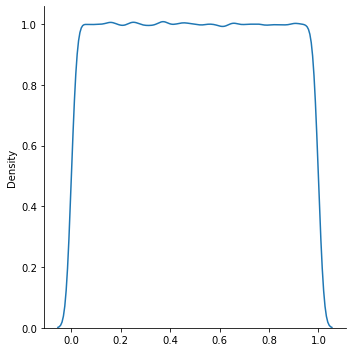

In [86]:
sns.displot(a,kind="kde")
plt.show()

In [82]:
u=np.random.randn(1000000)#만개를가져다 줌

b = []
for num in u:
    b.append(num)  

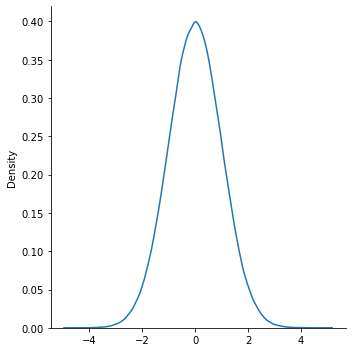

In [83]:
sns.displot(u,kind="kde")
plt.show()

# 이상치

In [88]:
randframe = pd.DataFrame(np.random.randn(1000,3))

In [89]:
randframe.describe()

,0,1,2
count,1000.000000,1000.000000,1000.000000
mean,-0.001578,-0.033519,-0.019228
std,0.991988,0.979427,0.988152
min,-3.019990,-3.275878,-3.486708
25%,-0.659344,-0.682884,-0.662050
50%,-0.035609,-0.086688,-0.021437
75%,0.635589,0.580671,0.659086
max,2.806875,3.165459,3.118854


In [90]:
randframe.std()

0    0.991988
1    0.979427
2    0.988152
dtype: float64

In [92]:
num=randframe[(np.abs(randframe) > (3*randframe.std())).any(1)]
#표준편차*3보다 큰값을 찾아라 (어떤 컬럼 한개라도 그렇다면 전부다)
num

,0,1,2
46,-0.331502,-3.275878,0.252490
58,1.734162,0.279499,-3.486708
173,-2.117306,1.735835,-3.230652
174,-0.138903,3.151809,-0.185764
251,0.364154,-2.973767,-1.082959
487,0.577897,-0.042116,-3.184587
513,-0.326827,-0.911424,-3.397828
670,1.180290,3.009481,-0.747588
704,-0.833994,3.165459,0.886090
874,-3.019990,0.267691,-0.757351


In [93]:
randframe.drop(num)


,0,1,2
3,0.242164,-0.738133,-2.074365
4,-0.565221,1.119154,-0.181981
5,-0.454838,-1.127839,0.214785
6,-0.773627,-0.551631,1.765492
7,-0.409561,-0.806740,-0.037735
...,...,...,...
995,0.782466,-0.750917,0.057746
996,0.169871,-0.058017,-0.196936
997,-0.106684,0.325567,0.424839
998,0.334767,0.105565,-1.158091


In [107]:
s="dhfdhfkashdfkhsdkfepjfnvn"

rs=random.choice(s)
rs

's'

In [108]:
a=[]
for rs in range(5):
    a.append(rs)
a    
    

[0, 1, 2, 3, 4]